In [10]:
#Multiple Linear regression for Nurse Survey
#Assomptions: 
### Regression residuals must be normally distributed.
# - A linear relationship is assumed between the dependent variable and the independent variables.
# - The residuals are homoscedastic and approximately rectangular-shaped.
# - Absence of multicollinearity is expected in the model, meaning that independent variables are not too highly correlated.
# - No Autocorrelation of the residuals.


In [177]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [178]:

# load the data and replace the '..' with nan
econ_df = pd.read_excel('Regression_1.xlsx')
econ_df = econ_df.replace('..','nan')
# set the index to the year column
econ_df = econ_df.set_index('index')


# check for nulls
display('-'*100)
display(econ_df.isnull().any())

# display the first five rows
display('-'*100)
display(econ_df.head())

'----------------------------------------------------------------------------------------------------'

Experience      False
Transfer        False
History         False
Price           False
Score           False
Involvement     False
dtype: bool

'----------------------------------------------------------------------------------------------------'

,Experience,Transfer,History,Price,Score,Involvement
index,,,,,,
1,0,6,4,1,5,3
2,0,3,5,3,8,1
3,15,1,8,2,6,1
4,5,1,2,0,10,3
5,5,3,5,1,7,1


,Experience,Transfer,History,Price,Score,Involvement
Experience,1.000000,0.007873,0.130427,0.046812,0.050390,0.108441
Transfer,0.007873,1.000000,-0.052013,0.047972,0.142417,0.050810
History,0.130427,-0.052013,1.000000,0.246381,0.037460,0.141575
Price,0.046812,0.047972,0.246381,1.000000,0.088841,0.117117
Score,0.050390,0.142417,0.037460,0.088841,1.000000,0.192744
Involvement,0.108441,0.050810,0.141575,0.117117,0.192744,1.000000


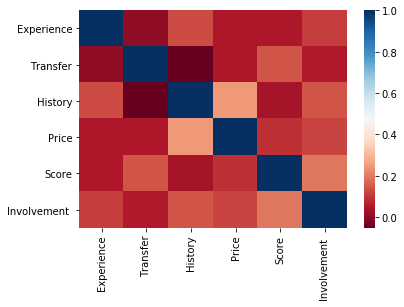

In [179]:
#print out the correlation frame

# calculate the correlation matrix
corr = econ_df.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [180]:

# get the summary
desc_df = econ_df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Experience,Transfer,History,Price,Score,Involvement
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,7.934426,3.770492,4.180328,1.540984,6.786885,1.901639
std,6.374085,2.019847,1.979126,0.958710,2.550260,1.075561
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,3.000000,1.000000,6.000000,1.000000
50%,5.000000,3.000000,4.000000,1.000000,7.000000,1.000000
75%,15.000000,6.000000,5.000000,2.000000,9.000000,3.000000
max,15.000000,6.000000,9.000000,5.000000,10.000000,3.000000
+3_std,27.056682,9.830032,10.117706,4.417115,14.437665,5.128321
-3_std,-11.187829,-2.289049,-1.757050,-1.335148,-0.863894,-1.325042


In [181]:

# define our input variable (X) & output variable

X = econ_df.drop('Price', axis = 1)
Y = econ_df[['Price']]

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 0.5866
----------------------------------------------------------------------------------------------------
The Coefficient for Experience is 0.014
The Coefficient for Transfer is 0.0087
The Coefficient for History is 0.14
The Coefficient for Score is 0.023
The Coefficient for Involvement  is 0.043


In [183]:

# Get multiple predictions
y_predict = regression_model.predict(X_test)
print(y_predict)


[[1.51028671]
 [0.99340099]
 [2.12425899]
 [1.43714776]
 [1.59439065]
 [1.525281  ]
 [1.95720097]
 [1.38333908]
 [1.93139482]
 [1.98213448]
 [1.59142284]
 [1.73311103]
 [1.52083249]]


In [184]:

# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

In [185]:
#Elavuete our model for heteroscedasticity that means the error is costant over time.
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity. \n")

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")   

0.8981586970776371 0.9433359268427061
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 0.8982
We fail to reject the null hypthoesis, so there is no heterosecdasticity. 

0.6692883016016471 0.6934119331601751
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 0.6693
We fail to reject the null hypthoesis, so there is no heterosecdasticity.


The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.04315
We reject the null hypthoesis, so there is autocorrelation.
----------------------------------------------------------------------------------------------------


C:\Users\andrea\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:524: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


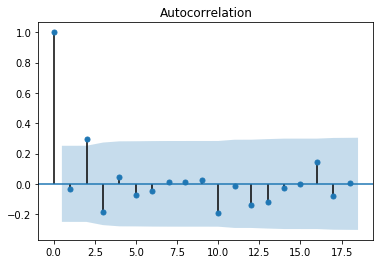

In [186]:
# test for autocorrelation (Important only for time-Series regressions not this one)
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

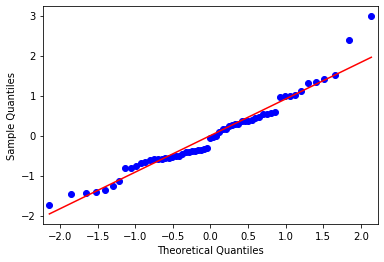

The mean of the residuals is 1.966e-16


In [187]:

import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [188]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.701
MAE 0.707
RMSE 0.837


In [189]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: -0.26


In [190]:
# make some confidence intervals, 95% by default
est.conf_int()

,0,1
const,-0.304320,1.706515
Experience,-0.038859,0.040400
Transfer,-0.102074,0.147852
History,-0.013950,0.242781
Score,-0.078218,0.122976
Involvement,-0.177743,0.301103


In [191]:
# estimate the p-values
est.pvalues

const           0.167887
Experience      0.969060
Transfer        0.714974
History         0.079571
Score           0.657477
Involvement     0.607728
dtype: float64

In [192]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.8808
Date:                Mon, 23 Mar 2020   Prob (F-statistic):              0.500
Time:                        02:27:37   Log-Likelihood:                -81.129
No. Observations:                  61   AIC:                             174.3
Df Residuals:                      55   BIC:                             186.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7011      0.502      1.397   